---
## kaggle Titanic 생존자 예측
---

- Survival : 생존여부 (0 - 사망 , 1 - 생존)
- Pclass : ticket에 따른 객실 등급
- Sex : 성별
- Age : 나이
- Sibsp : 동반 형제자매 or 배우자
- Parch : 동반 부모 or 자식
- Ticket : 티켓 번호
- Fare : 티켓 요즘
- Cabin : 객실 번호
- Embarked : 탑승지역항(C-Cherbourg / Q-Queenstown / S-Southampton)


In [1]:
# Titanic 칠몰 상태 확인
from IPython.display import Image
Image(url='https://images.squarespace-cdn.com/content/5006453fe4b09ef2252ba068/1351660113175-514SN9PXFWB9N2MNB8DV/TItanic-Survival-Infographic.jpg?format=1000w&content-type=image%2Fjpeg')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 학습에 사용할 데이터 
train_data = pd.read_csv('../titanic data/train.csv')
# 모델 검증 사용할 데이터
test_data = pd.read_csv('../titanic data/test.csv')
# gender_submission 제출파일형식
gender_submission_data = pd.read_csv('../titanic data/gender_submission.csv')

## 탐색적 데이터분석

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# 1등 칸에서 NaN 확인 
train_data[train_data['Pclass']==1]['Cabin'].isnull().sum(),train_data[train_data['Pclass']==1]['Cabin'].count()


(40, 176)

In [8]:
# 2등 칸에서 NaN 확인 
train_data[train_data['Pclass']==2]['Cabin'].isnull().sum(),train_data[train_data['Pclass']==2]['Cabin'].count()


(168, 16)

In [9]:

number = 1
# Nan 값 데이타 합
Pclass_Nan = train_data[train_data['Pclass']==number]['Cabin'].isnull().sum()
# Nan 이 아닌 데이타 수
Pclass_count = train_data[train_data['Pclass']==number]['Cabin'].count()
# Nan + 값이 잇는 데이타의 합 총 즉,총 ()칸의 수
Pclass_sum = Pclass_Nan + Pclass_count
# Nan 값 비율
Pclass_ratio = Pclass_Nan / Pclass_sum


print(number, '등칸 Nan 비율은 {:.4f}'.format(Pclass_ratio) )


1 등칸 Nan 비율은 0.1852


In [10]:
# function 만들어서 확인하기 
def Pclass_ratio(number):
  # Nan 값 데이타 합
  Pclass_Nan = train_data[train_data['Pclass']==number]['Cabin'].isnull().sum()
  # Nan 이 아닌 데이타 수
  Pclass_count = train_data[train_data['Pclass']==number]['Cabin'].count()
  # Nan + 값이 잇는 데이타의 합 총 즉,총 ()칸의 수
  Pclass_sum = Pclass_Nan + Pclass_count
  # Nan 값 비율
  Pclass_ratio = Pclass_Nan / Pclass_sum
  print(number, '등칸 Nan 비율은 {:.4f}'.format(Pclass_ratio) )


In [11]:
Pclass_ratio(1),Pclass_ratio(2),Pclass_ratio(3)

1 등칸 Nan 비율은 0.1852
2 등칸 Nan 비율은 0.9130
3 등칸 Nan 비율은 0.9756


(None, None, None)

# Pclass Cabin NaN 비율
- 1 등칸 Nan 비율은 0.1852
- 3 등칸 Nan 비율은 0.9756
- 3 등칸 Nan 비율은 0.9756

In [12]:
train_data.shape

(891, 12)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test_data.shape

(418, 11)

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Bar chart for Categorical Features

- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin


In [16]:
def bar_chart(featrue):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter : 
    feature : 컬럼들 => Pclass , Sex , SibSp , Parch , Embarked , Cabin
    '''
    survived = train_data[train_data['Survived']==1][featrue].value_counts()
    dead = train_data[train_data['Survived']==0][featrue].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Servived','Dead']
    df.plot(kind='bar',stacked=True)

---
# 데이터 시작화
---

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

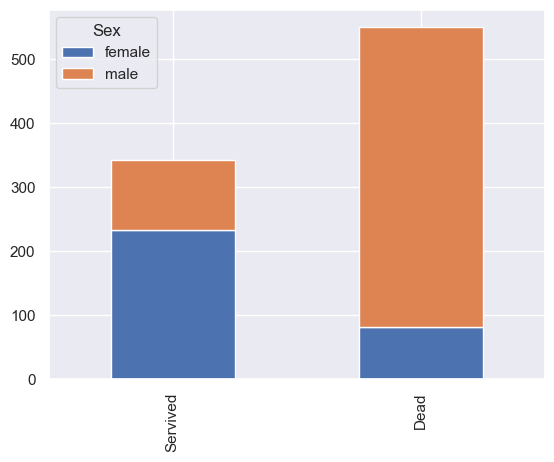

In [18]:
bar_chart('Sex')

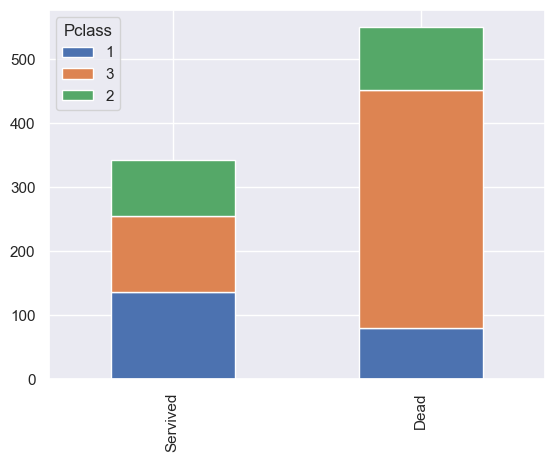

In [19]:
bar_chart('Pclass')

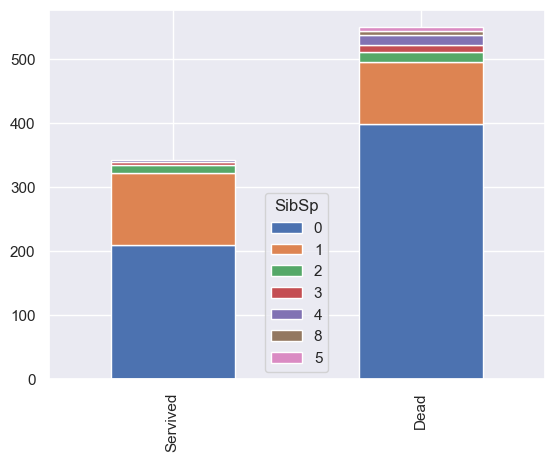

In [20]:
bar_chart('SibSp')

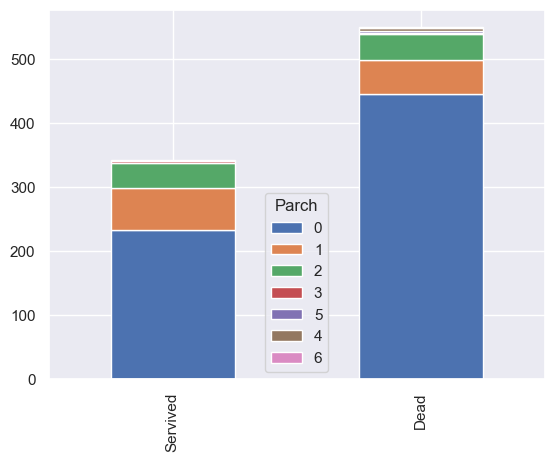

In [21]:
bar_chart('Parch')

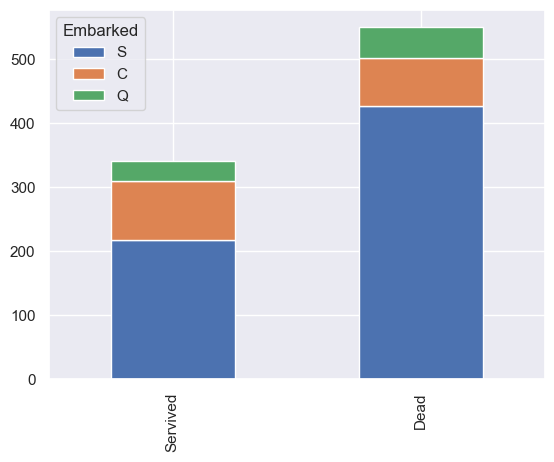

In [22]:
bar_chart('Embarked')

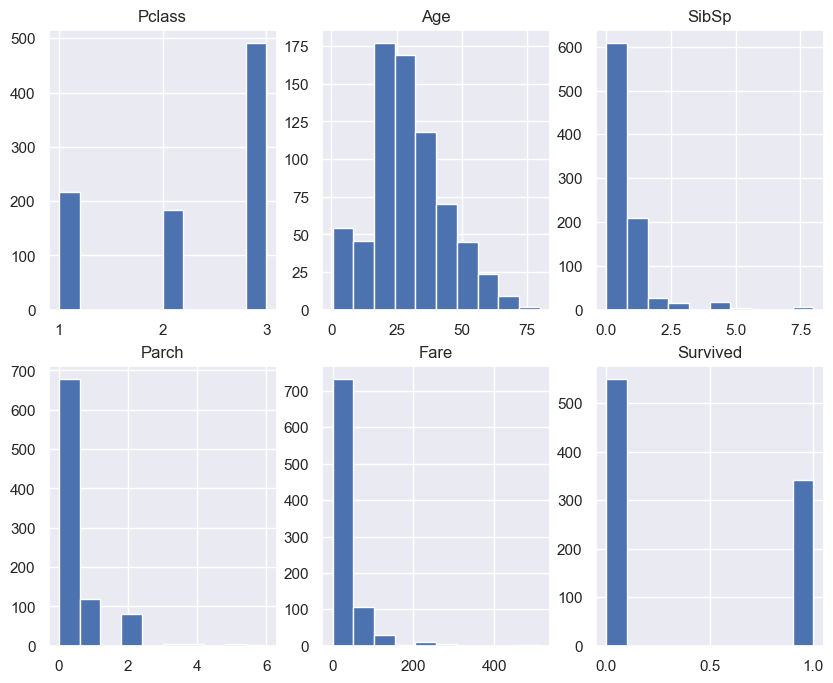

In [23]:
columns = ['Pclass','Age','SibSp','Parch','Fare','Survived']

plt.figure(figsize=(10,8))

for index in range(6):
    plt.subplot(2,3,index+1)
    plt.title(str(columns[index]))
    train_data[str(columns[index])].hist()

In [24]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [25]:
# train_data['Cabin'][1][0]
train_data['Cabin'][1][:1]

'C'

In [26]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


---
# 데이터 전처리 (feature engineering)
---

# Name : 이름 

- Mr , Master , Miss , Mrs , Mlle , Ms 추출

(*Mlle/Ms 여자 지칭호칭 , Mme 불어 남자지칭 호칭 )

(*Miss , Mrs 여자 지칭호칭 Master , Mr 남자지칭 호칭 )




In [28]:
train_data['Name'].str.extract(' ([a-zA-Z]+)\. ',expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [29]:
train_test_data = [train_data,test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\. ',expand=False)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [31]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [32]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [33]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [34]:
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
train_data['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object', name='Title')

In [36]:
test_data['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Col', 'Rev', 'Ms', 'Dr', 'Dona'], dtype='object', name='Title')

In [37]:
train_data['Title']=train_data['Title'].replace([
     'Dr', 'Rev', 'Major', 'Col',
     'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'
    ],'Rare')

train_data['Title']=train_data['Title'].replace(['Mlle'],'Miss')
train_data['Title']=train_data['Title'].replace(['Ms'],'Miss')
train_data['Title']=train_data['Title'].replace(['Mme'],'Mrs')

In [38]:
test_data['Title']=test_data['Title'].replace([
     'Dr', 'Rev', 'Major', 'Col',
     'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'
    ],'Rare')

test_data['Title']=test_data['Title'].replace(['Mlle'],'Miss')
test_data['Title']=test_data['Title'].replace(['Ms'],'Miss')
test_data['Title']=test_data['Title'].replace(['Mme'],'Mrs')

In [39]:
train_data['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], dtype='object', name='Title')

In [40]:
test_data['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], dtype='object', name='Title')

In [41]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [44]:
print('-----------------------')
print(train_data['Title'].value_counts())
print('-----------------------')
print(test_data['Title'].value_counts())

# {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

-----------------------
Title
1    517
2    185
3    126
4     40
5     23
Name: count, dtype: int64
-----------------------
Title
1    240
2     79
3     72
4     21
5      6
Name: count, dtype: int64


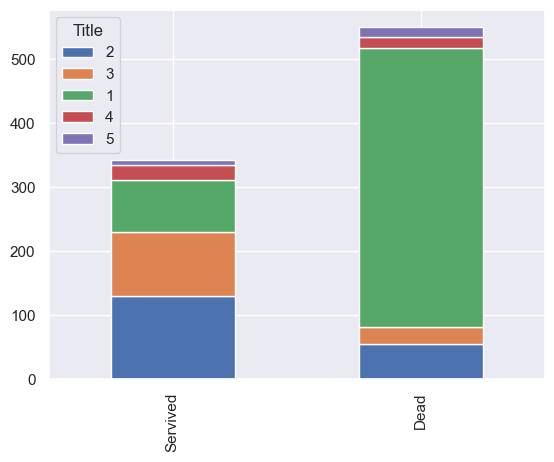

In [45]:
bar_chart('Title')
# {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

In [46]:
pd.crosstab(train_data['Title'],train_data['Sex'])
# {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

Sex,female,male
Title,,
1,0,517
2,185,0
3,126,0
4,0,40
5,3,20


In [47]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['Title'].values.reshape(-1,1) # 2D array로 변환
    scaler.fit(array) # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['Title'] = pd.Series(scaler.transform(array).reshape(-1)) # 스케일링 후 series로 추가

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.00


# Sex : 성별

- female	: 1
- male : 0

In [50]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
sex_mapping = {'male':0, 'female':1}

train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [52]:
print('-----------------------')
print(train_data['Sex'].value_counts())
print('-----------------------')
print(test_data['Sex'].value_counts())

-----------------------
Sex
0    577
1    314
Name: count, dtype: int64
-----------------------
Sex
0    266
1    152
Name: count, dtype: int64


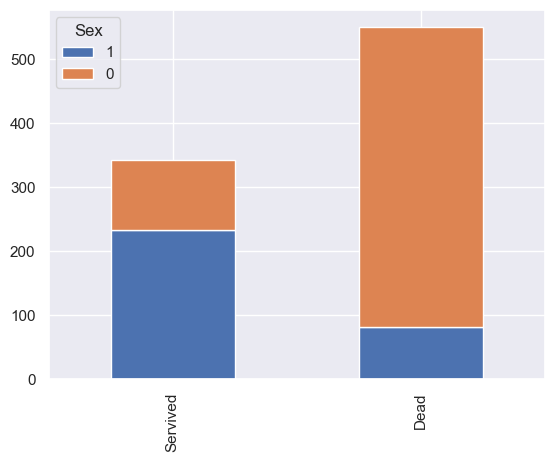

In [53]:
bar_chart('Sex')

# Age : 나이

-  0 (0세-16세)
-  1 (16세<x<=26세)
-  2 (26세<x<=36세)
-  3 (36세<x<=46세)
-  4 (46세<x<=56세)
- 5 (56세<x<=66세)
-  6 (66세<x<=76세)
- 7 (x<76세)

In [54]:
train_data['Age'].isnull().sum()

177

In [55]:
test_data['Age'].isnull().sum()

86

In [56]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0.00
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S,0.00
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C,0.50
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C,0.00
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7.2292,NaN,C,0.00
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,NaN,S,0.25
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9.5000,NaN,S,0.00
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7.8958,NaN,S,0.00


In [57]:
train_data.iloc[:10,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.50
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0.50
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.00
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0.00
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0.00
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,0.75
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,0.50
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,0.50


In [58]:
# age -> missing value -> title 's (1-5) age median -> fillna

train_data['Age'].fillna(
    train_data.groupby('Title')['Age'].transform('mean')
    # train_data.groupby('Title')['Age'].transform('median')
    ,inplace=True
)

In [59]:
train_data.iloc[:6,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,S,0.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,C,0.50
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,S,0.50
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,S,0.00
5,6,0,3,"Moran, Mr. James",0,32.36809,0,0,330877,8.4583,NaN,Q,0.00


In [60]:
test_data['Age'].fillna(
    test_data.groupby('Title')['Age'].transform('mean')
    # test_data.groupby('Title')['Age'].transform('median')
    ,inplace=True
)

c:\Users\user\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\user\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


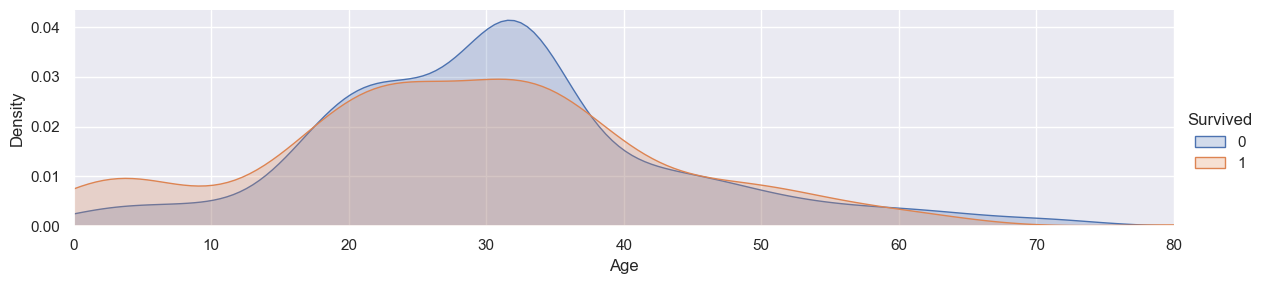

In [61]:
# 데이터와 차트연동
facet = sns.FacetGrid(train_data, hue='Survived' ,aspect=4)
 
facet.map(sns.kdeplot,'Age',shade=True)
# x축 범위 지정
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.show()

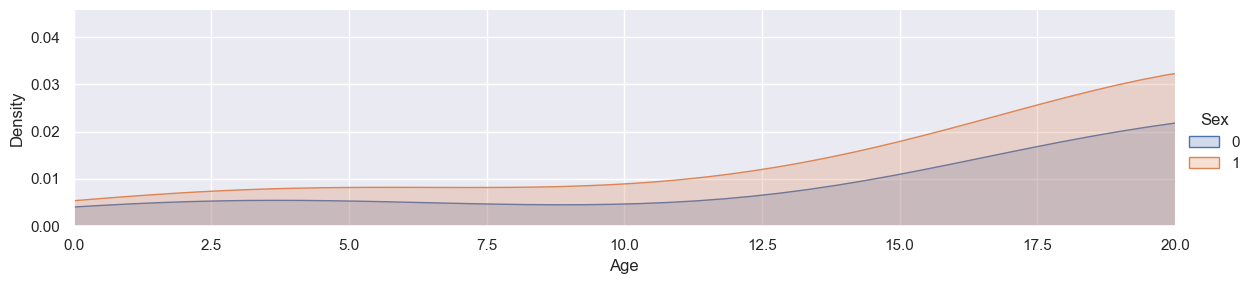

In [62]:
# 데이터와 차트연동
facet = sns.FacetGrid(train_data, hue='Sex' ,aspect=4)

facet.map(sns.kdeplot,'Age',fill=True)
# x축 범위 지정
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

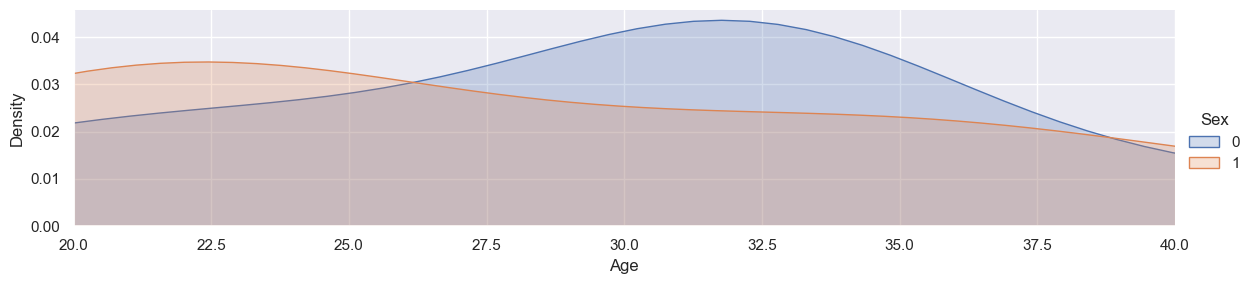

In [63]:
# 데이터와 차트연동
facet = sns.FacetGrid(train_data, hue='Sex' ,aspect=4)

facet.map(sns.kdeplot,'Age',fill=True)
# x축 범위 지정
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

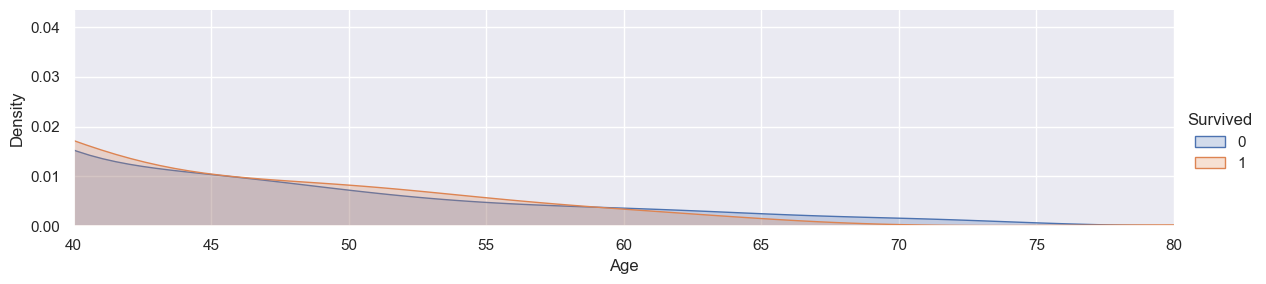

In [64]:
# 데이터와 차트연동
facet = sns.FacetGrid(train_data, hue='Survived' ,aspect=4)

facet.map(sns.kdeplot,'Age',fill=True)
# x축 범위 지정
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(40,80)
plt.show()

# Age Catagorical 을 AgeBand 컬럼에 만들기 

In [65]:
# # Age Catagorical 
# train_data_cp = train_data.copy()
# train_data.loc[train_data['Age']<=16,'Age']
train_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.845638
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [66]:
train_data['Age'] = train_data['Age'].apply(lambda x : int(x))


In [67]:
train_data['Age'].isnull().sum()

0

In [68]:

# -  feature vector map :
#  0 (0세-16세)
#  1 (16세<x<=26세)
#  2 (26세<x<=36세)
#  3 (36세<x<=46세)
#  4 (46세<x<=56세)
#  5 (56세<x<=66세)
#  6 (66세<x<=76세)
#  7 (x<76세)

train_data.loc[train_data['Age']<16,'AgeBand'] = 0
train_data.loc[(train_data['Age']>=16) & (train_data['Age']<=26),'AgeBand']=1
train_data.loc[(train_data['Age']>26) & (train_data['Age']<=36),'AgeBand']=2
train_data.loc[(train_data['Age']>36) & (train_data['Age']<=46),'AgeBand']=3
train_data.loc[(train_data['Age']>46) & (train_data['Age']<=56),'AgeBand']=4
train_data.loc[(train_data['Age']>56) & (train_data['Age']<=66),'AgeBand']=5
train_data.loc[(train_data['Age']>66) & (train_data['Age']<=76),'AgeBand']=6
train_data.loc[train_data['Age']>76,'AgeBand']=7


In [69]:
test_data.loc[test_data['Age']<16,'AgeBand'] = 0
test_data.loc[(test_data['Age']>=16) & (test_data['Age']<=26),'AgeBand']=1
test_data.loc[(test_data['Age']>26) & (test_data['Age']<=36),'AgeBand']=2
test_data.loc[(test_data['Age']>36) & (test_data['Age']<=46),'AgeBand']=3
test_data.loc[(test_data['Age']>46) & (test_data['Age']<=56),'AgeBand']=4
test_data.loc[(test_data['Age']>56) & (test_data['Age']<=66),'AgeBand']=5
test_data.loc[(test_data['Age']>66) & (test_data['Age']<=76),'AgeBand']=6
test_data.loc[test_data['Age']>76,'AgeBand']=7

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0.00,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,0.50,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,0.50,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0.00,2.0


In [71]:
test_data[test_data['AgeBand'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand


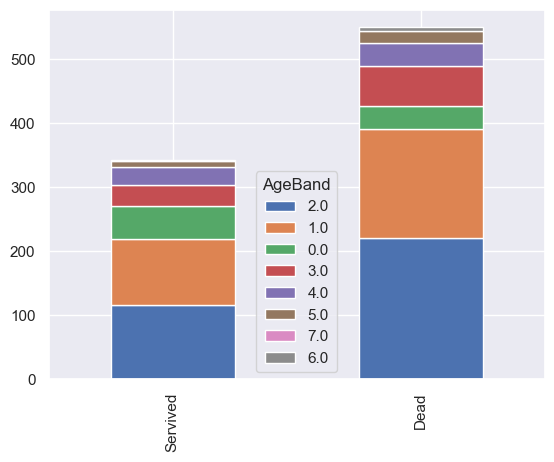

In [72]:
bar_chart('AgeBand')

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['AgeBand'].values.reshape(-1,1) # 2D array로 변환
    scaler.fit(array) # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1)) # 스케일링 후 series로 추가
    

In [75]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,2.0,0.333333
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.5,4.0,0.666667
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,5.0,0.833333
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,2.0,0.333333
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.5,1.0,0.166667


---
# Embarked (선착장)
---

In [76]:
train_data['Embarked'].isnull().sum()

2

In [77]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0,B28,NaN,0.25,3.0,0.428571
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80.0,B28,NaN,0.50,5.0,0.714286


In [78]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()

In [79]:
train_data[train_data['Pclass']==1]['Fare'].value_counts()

Fare
26.5500     15
52.0000      7
53.1000      5
30.0000      5
30.5000      5
            ..
75.2500      1
55.4417      1
211.5000     1
81.8583      1
5.0000       1
Name: count, Length: 94, dtype: int64

In [80]:
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()

In [81]:
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()

In [82]:
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df

Embarked,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


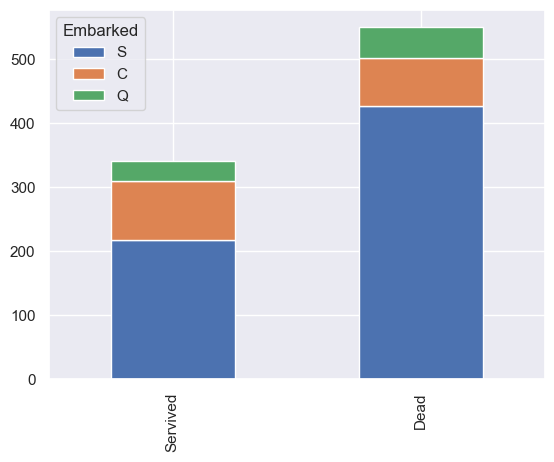

In [83]:
bar_chart('Embarked')

In [84]:
# null  가장 비율이 많은 S로 채우겠다 ( 2개뿐이라 ㅎㅎ)
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [85]:
test_data[train_data['Embarked'].isnull()]

C:\Users\user\AppData\Local\Temp\ipykernel_6776\1458617981.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data[train_data['Embarked'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale


In [86]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [87]:
# S-Southampton 0
# C-Cherbourg  1
# Q-Queenstown 2
Embarked_mapping = {'S':0,'C':1,'Q':2}

train_data['Embarked_num'] = train_data['Embarked'].map(Embarked_mapping)
test_data['Embarked_num'] = test_data['Embarked'].map(Embarked_mapping)

In [88]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0.00,1.0,0.142857,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,0.50,3.0,0.428571,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25,1.0,0.142857,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,0.50,2.0,0.285714,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0.00,2.0,0.285714,0


In [89]:
scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['Embarked_num'].values.reshape(-1,1) # 2D array로 변환
    scaler.fit(array) # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['Embarked_num'] = pd.Series(scaler.transform(array).reshape(-1)) # 스케일링 후 series로 추가
    

In [90]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0.00,1.0,0.142857,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,0.50,3.0,0.428571,0.5
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25,1.0,0.142857,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,0.50,2.0,0.285714,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0.00,2.0,0.285714,0.0


---
# Fare (가격)처리
---

In [91]:
train_data['Fare'].isnull().sum()

0

In [92]:
test_data['Fare'].isnull().sum()

1

In [93]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale,Embarked_num
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0.0,5.0,0.833333,0.0


In [94]:
test_data['Fare'].fillna(
    test_data.groupby(by='Pclass')['Fare'].transform('median')
    ,inplace=True
)

In [95]:
test_data['Fare'].isnull().sum()

0

In [96]:
# 동일한 개수로 5개의 요금 범주 생성
train_data['FareBand'] = pd.qcut(train_data['Fare'],q=5)
train_data.groupby(by='FareBand',as_index=False)['Survived'].mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [97]:
train_data['FareBand'] = pd.qcut(train_data['Fare'],q=5,labels=[0,1,2,3,4])

train_data.groupby(by='FareBand',as_index=False)['Survived'].mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,0,0.217877
1,1,0.201087
2,2,0.424419
3,3,0.444444
4,4,0.642045


In [98]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale,Embarked_num,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0.00,1.0,0.142857,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,0.50,3.0,0.428571,0.5,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.25,1.0,0.142857,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,0.50,2.0,0.285714,0.0,4
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0.00,2.0,0.285714,0.0,1


In [99]:
# 	FareBand	
# 0	(-0.001, 7.854]	
# 1	(7.854, 10.5]	
# 2	(10.5, 21.679]	
# 3	(21.679, 39.688]
# 4	(39.688, 512.329]	

test_data.loc[(test_data['Fare']<=7.854),'FareBand']=0
test_data.loc[(test_data['Fare']>7.854)&(test_data['Fare']<=10.500),'FareBand']=1
test_data.loc[(test_data['Fare']>10.500)&(test_data['Fare']<=21.679),'FareBand']=2
test_data.loc[(test_data['Fare']>21.679)&(test_data['Fare']<=39.688),'FareBand']=3
test_data.loc[(test_data['Fare']>39.688),'FareBand']=4

In [100]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,AgeScale,Embarked_num,FareBand
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,2.0,0.333333,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0.5,4.0,0.666667,0.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,5.0,0.833333,1.0,1.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,2.0,0.333333,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0.5,1.0,0.166667,0.0,2.0


In [101]:
scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['FareBand'].values.reshape(-1,1) # 2D array로 변환
    scaler.fit(array) # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['FareBand'] = pd.Series(scaler.transform(array).reshape(-1)) # 스케일링 후 series로 추가
    

---
# Family column  / Alone column 추가 
---

- 'SibSp' 형제부모
- 'Parch' 부모 자녀

In [102]:
train_data['Family'] = train_data['SibSp']+train_data['Parch']+1
test_data['Family'] = test_data['SibSp']+test_data['Parch']+1

In [103]:
train_data.groupby(by='Family',as_index=False)['Survived'].mean().sort_values(by='Family')

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [104]:
train_data['Alone'] = 0
train_data.loc[train_data['Family']==1,'Alone'] = 1


test_data['Alone'] = 0
test_data.loc[test_data['Family']==1,'Alone'] = 1

In [105]:
train_data.groupby(by='Alone',as_index=False)['Survived'].mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


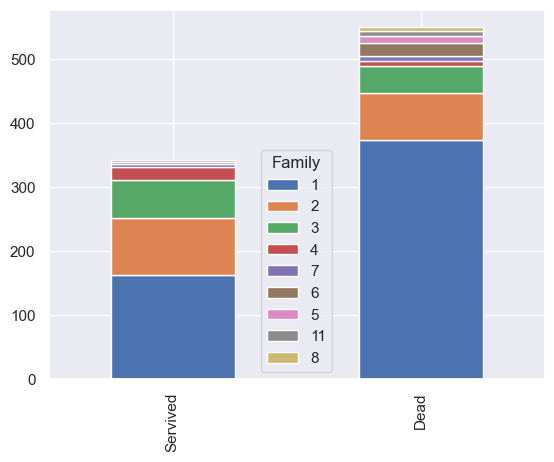

In [106]:
bar_chart('Family')

# Cabin 전처리

In [107]:
train_data['Cabin'].fillna('N',inplace=True)

In [108]:
train_data['Canbin_Band']=train_data['Cabin'].str[:1]

In [109]:
test_data['Cabin'].fillna('N',inplace=True)

In [110]:
test_data['Canbin_Band']=test_data['Cabin'].str[:1]

In [111]:
test_data['Canbin_Band'],train_data['Canbin_Band']

(0      N
 1      N
 2      N
 3      N
 4      N
       ..
 413    N
 414    C
 415    N
 416    N
 417    N
 Name: Canbin_Band, Length: 418, dtype: object,
 0      N
 1      C
 2      N
 3      C
 4      N
       ..
 886    N
 887    B
 888    N
 889    C
 890    N
 Name: Canbin_Band, Length: 891, dtype: object)

In [112]:
test_data['Canbin_Band'].value_counts(),train_data['Canbin_Band'].value_counts()

(Canbin_Band
 N    327
 C     35
 B     18
 D     13
 E      9
 F      8
 A      7
 G      1
 Name: count, dtype: int64,
 Canbin_Band
 N    687
 C     59
 B     47
 D     33
 E     32
 A     15
 F     13
 G      4
 T      1
 Name: count, dtype: int64)

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
train_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
AgeBand         0
AgeScale        0
Embarked_num    0
FareBand        0
Family          0
Alone           0
Canbin_Band     0
dtype: int64

In [115]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
AgeBand         0
AgeScale        0
Embarked_num    0
FareBand        0
Family          0
Alone           0
Canbin_Band     0
dtype: int64

In [116]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    int64  
 4   Age           418 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          418 non-null    float64
 9   Cabin         418 non-null    object 
 10  Embarked      418 non-null    object 
 11  Title         418 non-null    float64
 12  AgeBand       418 non-null    float64
 13  AgeScale      418 non-null    float64
 14  Embarked_num  418 non-null    float64
 15  FareBand      418 non-null    float64
 16  Family        418 non-null    int64  
 17  Alone         418 non-null    int64  
 18  Canbin_Band   418 non-null    

In [117]:
# LabelEncoder 클래스를 불러옵니다.
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le = le.fit(test_data['Canbin_Band'])
test_data['Canbin_Band'] = le.transform(test_data['Canbin_Band'])


In [118]:
# LabelEncoder 클래스를 불러옵니다.
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le = le.fit(train_data['Canbin_Band'])
train_data['Canbin_Band'] = le.transform(train_data['Canbin_Band'])


In [119]:
scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['Canbin_Band'].values.reshape(-1,1) # 2D array로 변환
    scaler.fit(array) # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['Canbin_Band'] = pd.Series(scaler.transform(array).reshape(-1)) # 스케일링 후 series로 추가
    

---
# 데이터 표준화 하기
---

In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    int64  
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Title         891 non-null    float64
 13  AgeBand       891 non-null    float64
 14  AgeScale      891 non-null    float64
 15  Embarked_num  891 non-null    float64
 16  FareBand      891 non-null    float64
 17  Family        891 non-null    int64  
 18  Alone         891 non-null    

In [121]:
order_columns = [ 'Pclass','Sex','Embarked_num'
                 ,'Title','AgeBand','Family','FareBand','Canbin_Band']

train_order = train_data[order_columns]
test_order = test_data[order_columns]


print('train shape : ', train_order.shape)
print('---------------------------------')
print('test shape : ', test_order.shape)

train shape :  (891, 8)
---------------------------------
test shape :  (418, 8)


In [122]:
train_label = train_data['Survived']

In [123]:
train_order.head()

,Pclass,Sex,Embarked_num,Title,AgeBand,Family,FareBand,Canbin_Band
0,3,0,0.0,0.00,1.0,2,0.00,0.875
1,1,1,0.5,0.50,3.0,2,1.00,0.250
2,3,1,0.0,0.25,1.0,1,0.25,0.875
3,1,1,0.0,0.50,2.0,2,1.00,0.250
4,3,0,0.0,0.00,2.0,1,0.25,0.875


In [124]:
train_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [125]:
test_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Embarked_num  418 non-null    float64
 3   Title         418 non-null    float64
 4   AgeBand       418 non-null    float64
 5   Family        418 non-null    int64  
 6   FareBand      418 non-null    float64
 7   Canbin_Band   418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.3 KB


In [126]:
test_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Embarked_num  418 non-null    float64
 3   Title         418 non-null    float64
 4   AgeBand       418 non-null    float64
 5   Family        418 non-null    int64  
 6   FareBand      418 non-null    float64
 7   Canbin_Band   418 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.3 KB


In [127]:
from sklearn.model_selection import train_test_split


X_tr, X_val, y_tr, y_val = train_test_split(train_order,train_label, test_size=0.1, random_state=11)
X_tr.shape, X_val.shape

((801, 8), (90, 8))

In [128]:
y_tr.head()

95     0
732    0
848    0
837    0
573    1
Name: Survived, dtype: int64

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


### max_depth 

-결정트리규제! 가지를 치자@!!!


In [131]:
from sklearn.metrics import mean_squared_error


score_list=[]
kfold_score_list=[]
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_tr, y_tr)
    prediction = clf.predict(X_tr)
    tree_mse = mean_squared_error(y_tr, prediction)
    tree_rmse = np.sqrt(tree_mse)
    scores = cross_val_score(clf, X_tr, y_tr,
                        scoring='neg_mean_squared_error', cv=10)
    tree_rmse_scores = np.sqrt(-scores)
    score_list.append(tree_rmse)
    kfold_score_list.append(tree_rmse_scores.mean())


In [132]:
score_data = {'훈련 세트 점수' : score_list, '교차 검증 점수' : kfold_score_list}
score_data_frame = pd.DataFrame(score_data, index=range(1,11))
score_data_frame


,훈련 세트 점수,교차 검증 점수
1,0.479284,0.480699
2,0.434182,0.467325
3,0.419559,0.435605
4,0.404408,0.415195
5,0.396615,0.442687
6,0.375598,0.451308
7,0.372259,0.453125
8,0.351562,0.454254
9,0.331455,0.452046
10,0.316030,0.442716


In [133]:
# 모델 훈련
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
clf.fit(train_order,train_label)
predict = clf.predict(test_order)

# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : predict})

submission.to_csv('./1st.csv', index=False)

In [134]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7607655502392344


### min_samples_leaf

In [193]:
score_list=[]
kfold_score_list=[]
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = i)
    clf.fit(X_tr, y_tr)
    prediction = clf.predict(X_tr)
    tree_mse = mean_squared_error(y_tr, prediction)
    tree_rmse = np.sqrt(tree_mse)
    scores = cross_val_score(clf, X_tr, y_tr,
                        scoring="neg_mean_squared_error", cv=3)
    tree_rmse_scores = np.sqrt(-scores)
    score_list.append(tree_rmse)
    kfold_score_list.append(tree_rmse_scores.mean())

In [194]:
score_data = {'훈련 세트 점수' : score_list, '교차 검증 점수' : kfold_score_list}
score_data_frame = pd.DataFrame(score_data, index=range(1,11))
score_data_frame

,훈련 세트 점수,교차 검증 점수
1,0.404408,0.428075
2,0.407483,0.426775
3,0.407483,0.428197
4,0.407483,0.434007
5,0.407483,0.435442
6,0.415072,0.438271
7,0.418069,0.438271
8,0.418069,0.438271
9,0.418069,0.439666
10,0.418069,0.439666


In [201]:
# 모델 훈련
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
clf.fit(train_order,train_label)
predict = clf.predict(test_order)

# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : predict})

submission.to_csv('./2st.csv', index=False)

In [202]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7751196172248804


### 로지스틱회귀

In [139]:
from sklearn.model_selection import GridSearchCV


In [140]:
lr_parameters ={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_lr_clf = GridSearchCV(lr_clf, param_grid=lr_parameters, scoring='accuracy', cv=5 )
grid_lr_clf.fit(X_tr, y_tr)
print('로지스틱회귀 하이퍼 파라미터:', grid_lr_clf.best_params_)
print('로지스틱회구 최고 예측 정확도:{0:.4f}'.format(grid_lr_clf.best_score_))
best_lr_clf = grid_lr_clf.best_estimator_


로지스틱회귀 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2'}
로지스틱회구 최고 예측 정확도:0.8052


c:\Users\user\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\anaconda3\envs

In [141]:
# X_tr, X_val, y_tr, y_val
#최적으로 학습된 estimator 로 예측
lr_predictions = best_lr_clf.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_predictions)

print('로지스틱회귀 테스트 최종 정확도 : {0:.4f}'.format(lr_accuracy))

로지스틱회귀 테스트 최종 정확도 : 0.8667


In [142]:
# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : lr_accuracy})

submission.to_csv('./3st.csv', index=False)

In [143]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7727272727272727


In [145]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

xgb = XGBClassifier()
lgb = LGBMClassifier()
gbm = GradientBoostingClassifier()
cat = CatBoostClassifier()

lreg = LogisticRegression()

In [146]:
# 최적의 파라미터 값 찾아보기
from sklearn.model_selection import GridSearchCV
# XGB
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    
# LGB                        
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
              }
# GBM              
param_gbm = {"max_depth" : [4,5,6,7,8,9,10],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "n_estimators" : [100,200,300,500]
              }
# CAT
param_cat = {"depth" : [6,4,5,7,8,9,10],
          "iterations" : [250,100,500,1000],
          "learning_rate" : [0.001,0.01,0.1,0.2,0.3], 
          "l2_leaf_reg" : [2,5,10,20,30],
          "border_count" : [254]
          }

# Logistic
param_lreg = { 'C' : [1.0, 3, 5, 7, 10],
              'max_iter': [50, 200, 100, 300, 500,700, 800]
              }


In [147]:
# cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)

gscv_xgb.fit(train_order,train_label)

print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   0.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   0.1s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   0.3s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, min_child_weight=1, n_es

In [148]:
# cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_lgb.fit(train_order,train_label)

print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))


Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=500; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=25, n_estimators=100, num_leaves=

In [152]:
gscv_lgb.predict(test_order)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [154]:
# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : gscv_lgb.predict(test_order)})

submission.to_csv('./4st.csv', index=False)

In [155]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7727272727272727


In [156]:
# cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
gscv_gbm = GridSearchCV (estimator = gbm, param_grid = param_gbm, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_gbm.fit(train_order,train_label)

print("="*30)
print('GBM 파라미터: ', gscv_gbm.best_params_)
print('GBM 예측 정확도: {:.4f}'.format(gscv_gbm.best_score_))


Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_

In [157]:
# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : gscv_gbm.predict(test_order)})

submission.to_csv('./5st.csv', index=False)

In [158]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7727272727272727


In [159]:
# # cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
# gscv_cat = GridSearchCV (estimator = cat, param_grid = param_cat, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_cat.fit(train_order,train_label)

# print("="*30)
# print('CAT 파라미터: ', gscv_cat.best_params_)
# print('CAT 예측 정확도: {:.4f}'.format(gscv_cat.best_score_))




In [160]:
# # cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
# gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_gbm = GridSearchCV (estimator = gbm, param_grid = param_gbm, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_cat = GridSearchCV (estimator = cat, param_grid = param_cat, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_xgb.fit(train_order,train_label)
# gscv_lgb.fit(train_order,train_label)
# gscv_gbm.fit(train_order,train_label)
# gscv_cat.fit(train_order,train_label)

# print("="*30)
# print('Lreg 파라미터: ', gscv_lreg.best_params_)
# print('Lreg 예측 정확도: {:.4f}'.format(gscv_lreg.best_score_))
# print("="*30)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [162]:
y_pred=model.predict(X_val)

# X_tr, X_val, y_tr, y_val


In [164]:
model.score(X_val,y_val)

0.8777777777777778

In [172]:
# 예측 결과 저장
submission = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : model.predict(test_order)})

submission.to_csv('./6st.csv', index=False)

In [173]:
answer = pd.read_csv('../wonseog/답/올리면 뒤짐!!.csv')
del answer['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, answer)
print(accuracy)

0.7727272727272727
